In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import detrend

   year  month  fraction  value   sd  observations  indicator
0  1749      1  1749.042   96.7 -1.0            -1          1
1  1749      2  1749.123  104.3 -1.0            -1          1
2  1749      3  1749.204  116.7 -1.0            -1          1
3  1749      4  1749.288   92.8 -1.0            -1          1
4  1749      5  1749.371  141.7 -1.0            -1          1


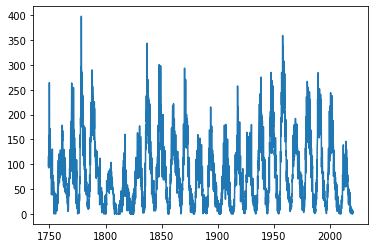

In [2]:
df = pd.read_csv("SN_m_tot_V2.0.csv", delimiter=';')
print(df.head())
x = np.array(df["value"])
y = np.array(df["fraction"])
plt.plot(y,x)
plt.savefig("graphs/raw_data.png",dpi=1200)

In [3]:
sampling_frequency = 12 #in years
sampling_interval = 1/sampling_frequency

In [4]:
#removing the dc component of the data
x = detrend(x)
x[0:10]

array([19.57958508, 27.17660282, 39.57362055, 15.67063829, 64.56765603,
       62.06467376, 80.8616915 , 33.35870924, 49.35572697, 48.65274471])

In [5]:
fourierTransform = np.fft.fft(x)/len(x)        
#removing the period of input data repeatation
fourierTransform = fourierTransform[range(int(len(x)/2))] 

samples     = len(x)
values      = np.arange(int(samples/2))
timePeriod  = samples/sampling_frequency
frequencies = values/timePeriod

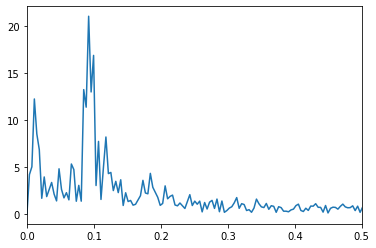

In [6]:
plt.plot(frequencies, abs(fourierTransform))
plt.savefig('fft.svg', format='svg', dpi=1200)
plt.savefig('graphs/fft.png', dpi=1200)
plt.xlim(0, 0.5)
plt.savefig('graphs/fft_zoomed_in.png', dpi=1200)

In [7]:
peakValue_location = np.argmax(abs(fourierTransform))
frequency_at_peak = frequencies[peakValue_location]
print("frequency in years : ")
print(1/frequency_at_peak)

frequency in years : 
10.853333333333332


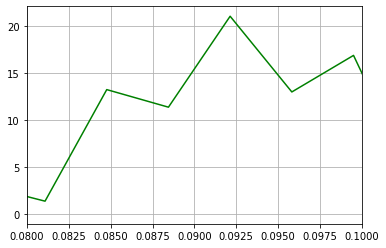

In [8]:
plt.grid()
plt.plot(frequencies, abs(fourierTransform),'g')
plt.xlim(0.08, 0.1)
plt.savefig('graphs/1st_period.svg', format='svg', dpi=1200)

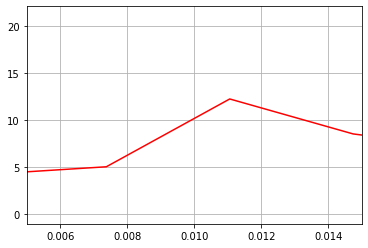

In [9]:
plt.plot(frequencies, abs(fourierTransform),'r')
plt.xlim(0.005, 0.015)
plt.grid()
plt.savefig('graphs/2nd_period.svg', format='svg', dpi=1200)

In [10]:
print("2nd frequency in years : ")
print(1/0.0110)

2nd frequency in years : 
90.90909090909092
